# Importing Module and define directories

In [11]:
project_dir = '../../'
data_dir = project_dir + 'data/'

import sys
sys.path.append(project_dir + 'NN/')

import numpy as np
import importlib
import time
import matplotlib.pyplot as plt
import MLP
importlib.reload(MLP)
from MLP import MLP

# Train - Validation Split

In [12]:
data=np.loadtxt("../../data/TR.csv",delimiter=",")
input_data=data[:,1:-2][0:1000]
labels=data[:,-2:][0:1000]
val_data=data[:,1:-2][1000:-1]
val_labels=data[:,-2:][1000:-1]

# Define the MLP

In [13]:
structure=[10,8,20,np.shape(labels)[1]]
act_func=[("sigmoid",1),("sigmoid",1),("sigmoid",1),("linear",1)]
start=[0.001,0.05,0.05,0.01]
learning_rate=5e-5
lamb=1e-4
netw = MLP(structure, func=act_func,
           starting_points=start, 
           eta = learning_rate, lamb = lamb)

## Train the model

In [14]:
N_epoch = 20
netw.train(input_data, labels, val_data, val_labels, epoch = N_epoch)

Epoch 20:  [train MEE = 6.9965]  [val MEE = 6.7404]                              
Elapsed time: 0.3155364990234375 s


### And... retrain the model!

In [15]:
netw.train(input_data, labels, val_data, val_labels, epoch = N_epoch)

Epoch 40:  [train MEE = 6.2715]  [val MEE = 6.0247]                              
Elapsed time: 0.3196837902069092 s


## Predict the output

In [16]:
train_pred = netw.predict(input_data)
val_pred = netw.predict(val_data)

# Plot results

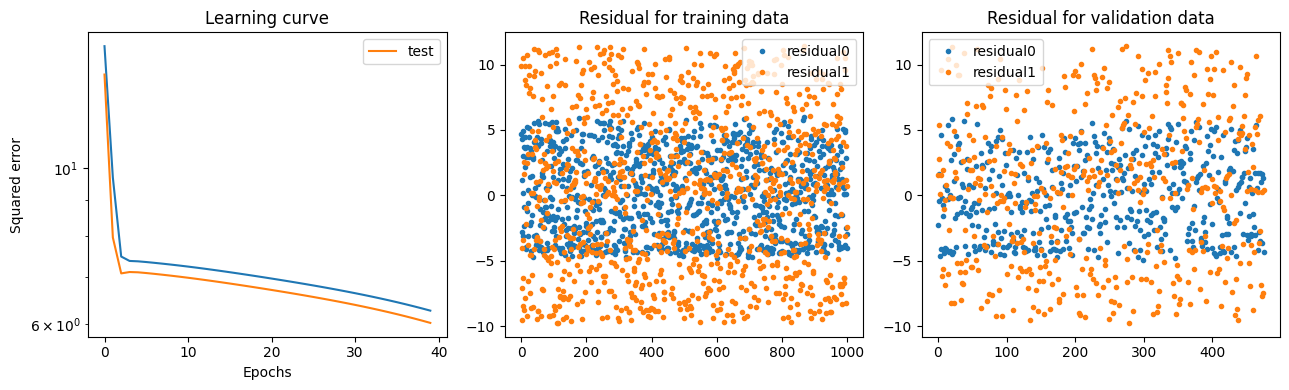

In [17]:
def plot_results(netw):
    train_pred = netw.predict(input_data)
    val_pred = netw.predict(val_data)
    x = np.arange(len(netw.train_MEE))

    fig = plt.figure(figsize=(13,4))

    fig.add_subplot(131)
    plt.plot(x,netw.train_MEE)
    plt.plot(x,netw.val_MEE,label="test")
    plt.title("Learning curve")
    plt.xlabel("Epochs")
    plt.ylabel("Squared error")
    plt.yscale("log")
    plt.legend()

    fig.add_subplot(132)
    plt.title('Residual for training data')
    plt.plot(np.arange(len(labels)),labels[:,0]-train_pred[:,0],".",label="residual0")
    plt.plot(np.arange(len(labels)),labels[:,1]-train_pred[:,1],".",label="residual1")
    plt.legend()

    fig.add_subplot(133)
    plt.title('Residual for validation data')
    plt.plot(np.arange(len(val_labels)),val_labels[:,0]-val_pred[:,0],".",label="residual0")
    plt.plot(np.arange(len(val_labels)),val_labels[:,1]-val_pred[:,1],".",label="residual1")
    plt.legend()
    plt.tight_layout()
    plt.show()
plot_results(netw)

# Testing the save net option

In [18]:
netw.save_network('./save_a_net/net_prova.json')

In [19]:
restore_netw = MLP(filename = './save_a_net/net_prova.json', epoch_to_restore = -1)

In [20]:
restore_netw.train(input_data, labels, val_data, val_labels, epoch = 30)

Epoch 70:  [train MEE = 4.4504]  [val MEE = 4.2699]                              
Elapsed time: 0.45583581924438477 s


## Save during the training

In [21]:
structure=[10,8,20,np.shape(labels)[1]]
act_func=[("sigmoid",1),("sigmoid",1),("sigmoid",1),("linear",1)]
start=[0.001,0.05,0.05,0.01]
learning_rate=5e-5
lamb=1e-4
netw = MLP(structure, func=act_func,
           starting_points=start, 
           eta = learning_rate, lamb = lamb)
N_epoch = 200
netw.train(input_data, labels, val_data, val_labels, epoch = N_epoch, 
           save_rate = 50, filename = './save_a_net/net_prova_rate.json')

Epoch 200:  [train MEE = 3.3386]  [val MEE = 3.2172]                              
Elapsed time: 2.914152145385742 s


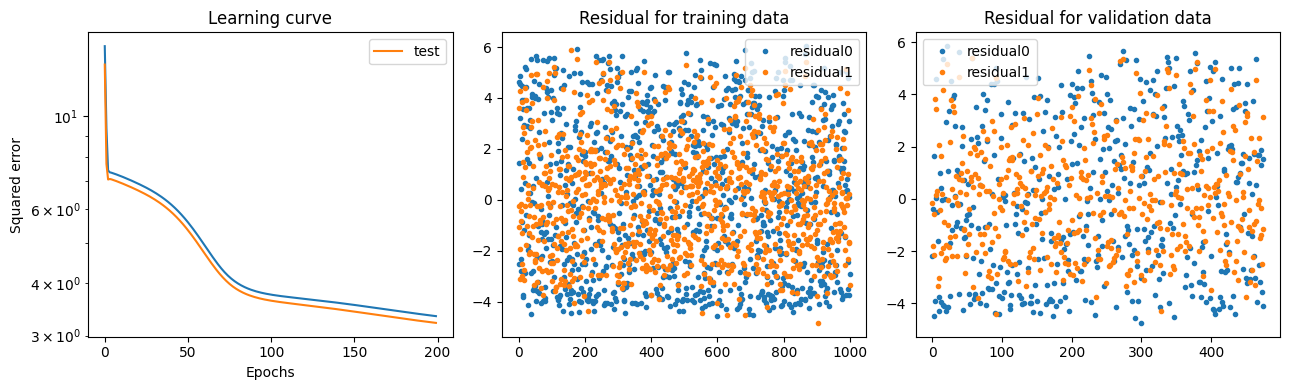

In [22]:
plot_results(netw)

## Let's reload older epoch!

In [23]:
restore_netw = MLP(filename = './save_a_net/net_prova_rate.json', epoch_to_restore = 50)

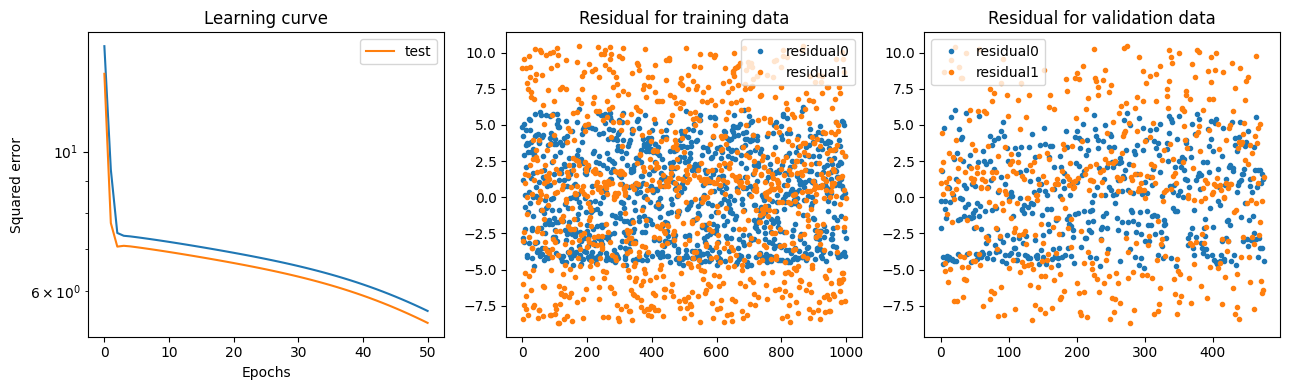

In [24]:
plot_results(restore_netw)